<a href="https://colab.research.google.com/github/ubsuny/PHY386/blob/Homework2025/2025/HW/codeBall01/HW6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
#assert function checks to see if a funciton is producing the correct output
#If something changes in the fuction the unit test will alert the programmer when pulling in github
#test fixtures can test more conplicated things like files
# test case can test the output functionality, or output type
#test suite is a collection of test cases
#test runner is a component whcih orchestrates the execution of tests and provides the outcome to the user
#pytest is a library that simplies Unit testings


In [78]:
!pip install astropy scikit-learn tensorflow matplotlib numpy photutils auto-stretch astroquery pytest ipytest


In [79]:
import ipytest
import pytest
ipytest.autoconfig()

In [80]:
def my_sum(a,b):
  return a+b

In [81]:
%%ipytest
#This defines unit test for pytest

def test_my_sum():

  assert my_sum(1,2) == 3
  assert my_sum(-1,3) == 2

.                                                                                            [100%]
1 passed in 0.03s


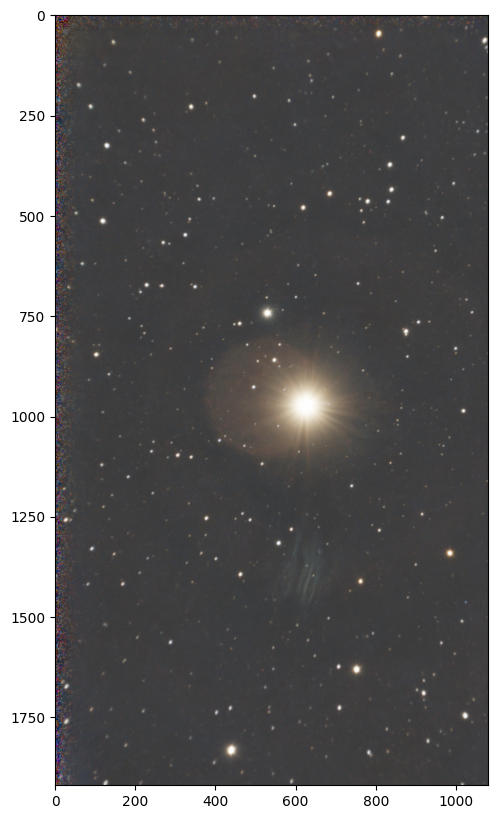

In [82]:
from astropy.io import fits
from auto_stretch import apply_stretch
import requests
from io import BytesIO
import matplotlib.pyplot as plt
import numpy as np

fits_url = "https://github.com/ubsuny/PHY386/raw/refs/heads/main/data/5.fits"

response = requests.get(fits_url)
fits_file = fits.open(BytesIO(response.content))
response.raise_for_status()
fits_data = fits.open(BytesIO(response.content))

#Transpose it??
hdul = fits.open(BytesIO(response.content))
data = hdul[0].data
data = np.transpose(hdul[0].data, (1,2,0))
hdul.close()

fig = plt.figure(figsize=(10,10))
#plt.imshow(apply_stretch(data), cmap='gray')
#plt.imshow(apply_stretch(data[800:-800,400:-400,:]))
plt.imshow(apply_stretch(data[:,:,:]))
plt.show()


In [83]:
import pandas as pd
from astropy.wcs import WCS
from astropy.stats import mad_std
from photutils.detection import DAOStarFinder


bkg_sigma = mad_std(np.mean(data, axis=2))

daofind = DAOStarFinder(fwhm=3.0, threshold=10. * bkg_sigma, min_separation = 15)
sources = daofind(np.mean(data, axis=2))

catalog = sources.to_pandas().sort_values('flux', ascending=False).head(10)
display(catalog)
catalog = sources.to_pandas().sort_values('flux', ascending=False).head(100)

#wcs = WCS(hdul[0].header)
#print(wcs)
#sky_coords = wcs.all_world2pix
#roundness could be used later to see if a particular star is a problem

,id,xcentroid,ycentroid,sharpness,roundness1,roundness2,npix,peak,flux,mag,daofind_mag
140,141,528.089176,742.247828,0.398289,-0.361663,0.034024,25,39497.666667,630290.333333,-14.498852,-8.135875
205,206,633.185782,969.568601,0.490310,-0.439071,-0.581985,25,26445.333333,590979.333333,-14.428931,-6.302044
373,374,437.349887,1834.096608,0.459582,-0.062020,0.682515,25,26797.000000,429697.000000,-14.082906,-7.667650
346,347,749.909651,1631.709088,0.429123,0.166398,0.599466,25,22284.333333,330005.000000,-13.796301,-7.616380
298,299,982.197622,1341.371925,0.471253,0.158762,0.136665,25,13940.666667,159010.333333,-13.003563,-7.440915
153,154,872.893225,787.852827,0.483923,-0.396032,-0.007165,25,8120.666667,81739.666667,-12.281082,-6.956562
13,14,805.123209,44.602722,0.438096,-0.516569,0.346404,25,4464.333333,66568.666667,-12.058175,-5.900823
98,99,117.908554,512.554651,0.484728,-0.277288,-0.019578,25,4147.666667,56548.666667,-11.881056,-5.876793
364,365,1020.349878,1746.984915,0.410428,0.570738,0.710913,25,3167.000000,56178.666667,-11.873929,-5.148435
65,66,832.885263,372.003519,0.415467,-0.491750,0.205219,25,3935.666667,52348.000000,-11.797250,-5.969601


In [84]:


wcs = WCS(hdul[0].header, naxis=2)
print(wcs)
#sky_coords = wcs.all_pix2world(catalog['xcentroid'],catalog['ycentroid'],1)
sky_coords = wcs.all_pix2world(catalog['xcentroid'],catalog['ycentroid'],1,ra_dec_order=True)
catalog['ra'] = sky_coords[0]
catalog['dec'] = sky_coords[1]
catalog

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN' 'DEC--TAN' 
CRVAL : 214.00640474607 19.1529172836748 
CRPIX : 540.0 960.0 
PC1_1 PC1_2  : 0.999958012274415 -0.00910291852812561 
PC2_1 PC2_2  : 0.00916191929831995 0.999958583823266 
CDELT : -0.00110914764691023 0.00110936513871624 
NAXIS : 1080  1920  3


,id,xcentroid,ycentroid,sharpness,roundness1,roundness2,npix,peak,flux,mag,daofind_mag,ra,dec
140,141,528.089176,742.247828,0.398289,-0.361663,0.034024,25,39497.666667,630290.333333,-14.498852,-8.135875,214.018045,18.911241
205,206,633.185782,969.568601,0.490310,-0.439071,-0.581985,25,26445.333333,590979.333333,-14.428931,-6.302044,213.897091,19.164447
373,374,437.349887,1834.096608,0.459582,-0.062020,0.682515,25,26797.000000,429697.000000,-14.082906,-7.667650,214.137035,20.121386
346,347,749.909651,1631.709088,0.429123,0.166398,0.599466,25,22284.333333,330005.000000,-13.796301,-7.616380,213.766044,19.899987
298,299,982.197622,1341.371925,0.471253,0.158762,0.136665,25,13940.666667,159010.333333,-13.003563,-7.440915,213.489976,19.579732
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,100,767.790785,516.314768,0.473448,-0.489153,0.119836,25,331.000000,5336.666667,-9.318175,-2.929734,213.735023,18.662861
50,51,1051.745355,288.897131,0.435669,-0.684505,0.229157,25,276.333333,5274.333333,-9.305419,-2.311121,213.401131,18.412734
35,36,581.947422,212.176831,0.452100,-0.132725,0.361656,25,283.666667,5234.666667,-9.297223,-2.413553,213.949448,18.323818
201,202,671.149207,932.940157,0.469717,-0.589005,-0.062184,25,227.666667,5154.666667,-9.280501,-1.106325,213.852162,19.124168


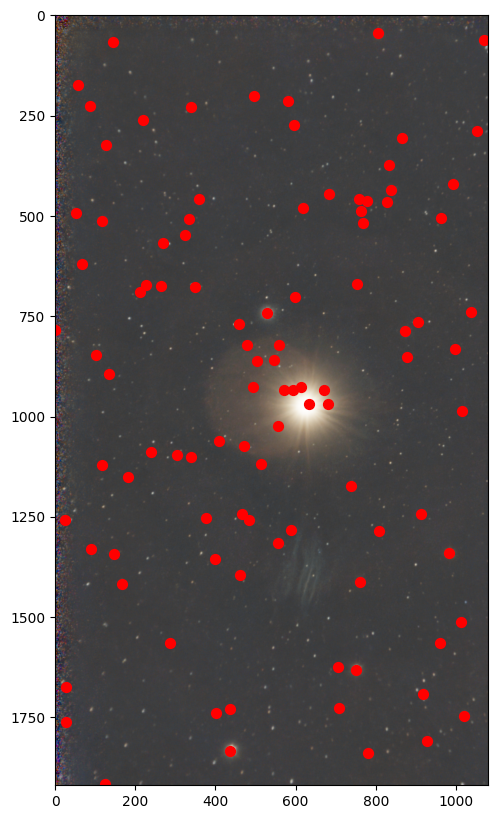

In [85]:
fig = plt.figure(figsize=(10,10))
plt.imshow(apply_stretch(data))

plt.scatter(catalog['xcentroid'],catalog['ycentroid'], color='red',marker= 'o',s=50)
plt.show()

In [86]:
#Task 2:
from astroquery.simbad import Simbad
import astropy.units as u
#from astropy import units as u
from astropy.coordinates import SkyCoord
from tqdm import tqdm

#tqdm gives a progress bar

options = Simbad.list_votable_fields()



In [87]:
options[options["type"] == "bundle of basic colums"][["name","description"]]

name,description
object,object


In [88]:
qu = Simbad()
qu.add_votable_fields('basic')
#result = Simbad.query_object('Betelgeuse')
#result

In [90]:
Simbad.ROW_LIMIT = 1
Simbad.reset_votable_fields()
Simbad.add_votable_fields("mesdistance","V", "sp", "otype", "ids")

for idx, row in tqdm(catalog.iterrows(), total=catalog.shape[0]):
  ra, dec = row["ra"], row["dec"]
  coord = SkyCoord(ra=ra*u.deg, dec=dec*u.deg)
  print(coord)
  try:
    result = qu.query_region(coord, radius="100s")
    if result:
      catalog.at[idx, "star_name"] = result[0]["main_id"]
      catalog.at[idx, "spectral_type"] = result[0]["sp_type"]
      catalog.at[idx, "object_type"] = result[0]["otype"]
      catalog.at[idx, "visual_mag"] = result[0]["V"]

      dist = result[0]["mesdistance.dist"]
      catalog.at[idx, "simbad_distance_pc"] = float(dist) if dist is not None else None

  except Exception as e:
    print(f"Error querying Simbad for {idx}: {e}")
catalog.to_csv('catalog.csv', index=False)
catalog

  0%|          | 0/100 [00:00<?, ?it/s]

<SkyCoord (ICRS): (ra, dec) in deg
    (214.01804473, 18.91124063)>


  1%|          | 1/100 [00:00<01:31,  1.08it/s]

Error querying Simbad for 140: 'V'
<SkyCoord (ICRS): (ra, dec) in deg
    (213.89709086, 19.16444671)>


  2%|▏         | 2/100 [00:01<00:52,  1.87it/s]

Error querying Simbad for 205: 'V'
<SkyCoord (ICRS): (ra, dec) in deg
    (214.13703457, 20.12138574)>


  3%|▎         | 3/100 [00:01<00:39,  2.43it/s]

Error querying Simbad for 373: 'V'
<SkyCoord (ICRS): (ra, dec) in deg
    (213.76604354, 19.89998684)>


  4%|▍         | 4/100 [00:01<00:33,  2.83it/s]

Error querying Simbad for 346: 'V'
<SkyCoord (ICRS): (ra, dec) in deg
    (213.48997596, 19.57973213)>


  5%|▌         | 5/100 [00:01<00:30,  3.12it/s]

Error querying Simbad for 298: 'V'
<SkyCoord (ICRS): (ra, dec) in deg
    (213.61416989, 18.96492264)>


  6%|▌         | 6/100 [00:02<00:28,  3.32it/s]

Error querying Simbad for 153: 'V'
<SkyCoord (ICRS): (ra, dec) in deg
    (213.68730436, 18.13998676)>


  7%|▋         | 7/100 [00:02<00:26,  3.45it/s]

Error querying Simbad for 13: 'V'
<SkyCoord (ICRS): (ra, dec) in deg
    (214.49569947, 18.65164712)>


  8%|▊         | 8/100 [00:02<00:26,  3.46it/s]

Error querying Simbad for 98: 'V'
<SkyCoord (ICRS): (ra, dec) in deg
    (213.44788683, 20.02987228)>


  9%|▉         | 9/100 [00:03<00:30,  2.96it/s]

Error querying Simbad for 364: 'V'
<SkyCoord (ICRS): (ra, dec) in deg
    (213.65762322, 18.50332666)>


 10%|█         | 10/100 [00:03<00:28,  3.17it/s]

Error querying Simbad for 65: 'V'
<SkyCoord (ICRS): (ra, dec) in deg
    (213.83368533, 18.58228269)>


 11%|█         | 11/100 [00:03<00:26,  3.34it/s]

Error querying Simbad for 77: 'V'
<SkyCoord (ICRS): (ra, dec) in deg
    (213.99156091, 19.54828979)>


 12%|█▏        | 12/100 [00:04<00:25,  3.48it/s]

Error querying Simbad for 293: 'V'
<SkyCoord (ICRS): (ra, dec) in deg
    (213.99923175, 19.04155389)>


 13%|█▎        | 13/100 [00:04<00:24,  3.53it/s]

Error querying Simbad for 178: 'V'
<SkyCoord (ICRS): (ra, dec) in deg
    (213.65342429, 18.57251442)>


 14%|█▍        | 14/100 [00:04<00:24,  3.58it/s]

Error querying Simbad for 75: 'V'
<SkyCoord (ICRS): (ra, dec) in deg
    (213.72303168, 18.60433744)>


 15%|█▌        | 15/100 [00:04<00:23,  3.59it/s]

Error querying Simbad for 86: 'V'
<SkyCoord (ICRS): (ra, dec) in deg
    (214.48133501, 18.44280305)>


 16%|█▌        | 16/100 [00:05<00:28,  2.97it/s]

Error querying Simbad for 54: 'V'
<SkyCoord (ICRS): (ra, dec) in deg
    (213.91111245, 18.62038575)>


 17%|█▋        | 17/100 [00:05<00:26,  3.12it/s]

Error querying Simbad for 90: 'V'
<SkyCoord (ICRS): (ra, dec) in deg
    (213.75246822, 19.65589079)>


 18%|█▊        | 18/100 [00:05<00:24,  3.29it/s]

Error querying Simbad for 311: 'V'
<SkyCoord (ICRS): (ra, dec) in deg
    (214.51938375, 19.02115532)>


 19%|█▉        | 19/100 [00:06<00:23,  3.41it/s]

Error querying Simbad for 173: 'V'
<SkyCoord (ICRS): (ra, dec) in deg
    (213.44775689, 19.18623352)>


 20%|██        | 20/100 [00:06<00:22,  3.51it/s]

Error querying Simbad for 212: 'V'
<SkyCoord (ICRS): (ra, dec) in deg
    (214.10455876, 19.63378783)>


 21%|██        | 21/100 [00:06<00:21,  3.60it/s]

Error querying Simbad for 307: 'V'
<SkyCoord (ICRS): (ra, dec) in deg
    (213.37905067, 18.16071788)>


 22%|██▏       | 22/100 [00:06<00:21,  3.66it/s]

Error querying Simbad for 15: 'V'
<SkyCoord (ICRS): (ra, dec) in deg
    (214.09960526, 18.93977032)>


 23%|██▎       | 23/100 [00:07<00:23,  3.31it/s]

Error querying Simbad for 146: 'V'
<SkyCoord (ICRS): (ra, dec) in deg
    (214.36987963, 18.83028449)>


 24%|██▍       | 24/100 [00:07<00:22,  3.45it/s]

Error querying Simbad for 123: 'V'
<SkyCoord (ICRS): (ra, dec) in deg
    (214.20244825, 19.47759139)>


 25%|██▌       | 25/100 [00:07<00:21,  3.55it/s]

Error querying Simbad for 278: 'V'
<SkyCoord (ICRS): (ra, dec) in deg
    (213.56953666, 19.96673484)>


 26%|██▌       | 26/100 [00:08<00:20,  3.63it/s]

Error querying Simbad for 355: 'V'
<SkyCoord (ICRS): (ra, dec) in deg
    (214.23481856, 18.33818964)>


 27%|██▋       | 27/100 [00:08<00:19,  3.69it/s]

Error querying Simbad for 39: 'V'
<SkyCoord (ICRS): (ra, dec) in deg
    (214.28446499, 19.30221725)>


 28%|██▊       | 28/100 [00:08<00:19,  3.72it/s]

Error querying Simbad for 239: 'V'
<SkyCoord (ICRS): (ra, dec) in deg
    (213.61923798, 18.42912839)>


 29%|██▉       | 29/100 [00:08<00:18,  3.75it/s]

Error querying Simbad for 51: 'V'
<SkyCoord (ICRS): (ra, dec) in deg
    (214.06033213, 19.11577786)>


 30%|███       | 30/100 [00:09<00:18,  3.76it/s]

Error querying Simbad for 196: 'V'
<SkyCoord (ICRS): (ra, dec) in deg
    (214.25549914, 18.69288506)>


 31%|███       | 31/100 [00:09<00:18,  3.78it/s]

Error querying Simbad for 103: 'V'
<SkyCoord (ICRS): (ra, dec) in deg
    (213.66315889, 18.60575128)>


 32%|███▏      | 32/100 [00:09<00:17,  3.79it/s]

Error querying Simbad for 87: 'V'
<SkyCoord (ICRS): (ra, dec) in deg
    (214.61420359, 19.47767162)>


 33%|███▎      | 33/100 [00:09<00:17,  3.80it/s]

Error querying Simbad for 282: 'V'
<SkyCoord (ICRS): (ra, dec) in deg
    (214.22862457, 18.83673755)>


 34%|███▍      | 34/100 [00:10<00:17,  3.80it/s]

Error querying Simbad for 125: 'V'
<SkyCoord (ICRS): (ra, dec) in deg
    (213.57747261, 18.93977689)>


 35%|███▌      | 35/100 [00:10<00:17,  3.80it/s]

Error querying Simbad for 144: 'V'
<SkyCoord (ICRS): (ra, dec) in deg
    (213.8188478, 19.89185074)>


 36%|███▌      | 36/100 [00:10<00:16,  3.79it/s]

Error querying Simbad for 344: 'V'
<SkyCoord (ICRS): (ra, dec) in deg
    (213.8175639, 20.00583713)>


 37%|███▋      | 37/100 [00:10<00:16,  3.80it/s]

Error querying Simbad for 358: 'V'
<SkyCoord (ICRS): (ra, dec) in deg
    (213.95409113, 19.5105423)>


 38%|███▊      | 38/100 [00:11<00:19,  3.15it/s]

Error querying Simbad for 288: 'V'
<SkyCoord (ICRS): (ra, dec) in deg
    (214.24522694, 19.30803647)>


 39%|███▉      | 39/100 [00:11<00:18,  3.33it/s]

Error querying Simbad for 242: 'V'
<SkyCoord (ICRS): (ra, dec) in deg
    (214.32512021, 18.83307082)>


 40%|████      | 40/100 [00:11<00:17,  3.35it/s]

<SkyCoord (ICRS): (ra, dec) in deg
    (214.31999858, 18.71337594)>


 41%|████      | 41/100 [00:12<00:17,  3.40it/s]

Error querying Simbad for 104: 'V'
<SkyCoord (ICRS): (ra, dec) in deg
    (213.77610099, 19.39160809)>


 42%|████▏     | 42/100 [00:12<00:16,  3.51it/s]

Error querying Simbad for 256: 'V'
<SkyCoord (ICRS): (ra, dec) in deg
    (213.46947427, 19.01335753)>


 43%|████▎     | 43/100 [00:12<00:15,  3.60it/s]

Error querying Simbad for 171: 'V'
<SkyCoord (ICRS): (ra, dec) in deg
    (214.53922041, 19.55865378)>


 44%|████▍     | 44/100 [00:13<00:15,  3.66it/s]

Error querying Simbad for 295: 'V'
<SkyCoord (ICRS): (ra, dec) in deg
    (213.69622402, 19.51509755)>


 45%|████▌     | 45/100 [00:13<00:17,  3.17it/s]

Error querying Simbad for 289: 'V'
<SkyCoord (ICRS): (ra, dec) in deg
    (213.50630526, 18.65097719)>


 46%|████▌     | 46/100 [00:13<00:16,  3.33it/s]

Error querying Simbad for 96: 'V'
<SkyCoord (ICRS): (ra, dec) in deg
    (214.0745551, 19.48346948)>


 47%|████▋     | 47/100 [00:13<00:15,  3.46it/s]

Error querying Simbad for 283: 'V'
<SkyCoord (ICRS): (ra, dec) in deg
    (214.61899608, 19.93928351)>


 48%|████▊     | 48/100 [00:14<00:14,  3.56it/s]

Error querying Simbad for 351: 'V'
<SkyCoord (ICRS): (ra, dec) in deg
    (214.63702292, 18.95041482)>


 49%|████▉     | 49/100 [00:14<00:14,  3.62it/s]

Error querying Simbad for 151: 'V'
<SkyCoord (ICRS): (ra, dec) in deg
    (214.1618132, 19.26250328)>


 50%|█████     | 50/100 [00:14<00:13,  3.68it/s]

Error querying Simbad for 226: 'V'
<SkyCoord (ICRS): (ra, dec) in deg
    (214.03780352, 19.32864992)>


 51%|█████     | 51/100 [00:15<00:13,  3.72it/s]

Error querying Simbad for 246: 'V'
<SkyCoord (ICRS): (ra, dec) in deg
    (214.62116806, 20.03669032)>


 52%|█████▏    | 52/100 [00:15<00:14,  3.25it/s]

Error querying Simbad for 366: 'V'
<SkyCoord (ICRS): (ra, dec) in deg
    (214.52714926, 18.33403991)>


 53%|█████▎    | 53/100 [00:15<00:13,  3.40it/s]

Error querying Simbad for 38: 'V'
<SkyCoord (ICRS): (ra, dec) in deg
    (214.31171938, 19.81992164)>


 54%|█████▍    | 54/100 [00:15<00:13,  3.48it/s]

Error querying Simbad for 334: 'V'
<SkyCoord (ICRS): (ra, dec) in deg
    (214.05021147, 18.31103499)>


 55%|█████▌    | 55/100 [00:16<00:12,  3.53it/s]

Error querying Simbad for 32: 'V'
<SkyCoord (ICRS): (ra, dec) in deg
    (213.73203187, 20.13022371)>


 56%|█████▌    | 56/100 [00:16<00:12,  3.57it/s]

Error querying Simbad for 375: 'V'
<SkyCoord (ICRS): (ra, dec) in deg
    (214.21405956, 18.59472035)>


 57%|█████▋    | 57/100 [00:16<00:12,  3.57it/s]

Error querying Simbad for 81: 'V'
<SkyCoord (ICRS): (ra, dec) in deg
    (213.75308718, 18.83201547)>


 58%|█████▊    | 58/100 [00:17<00:11,  3.59it/s]

Error querying Simbad for 121: 'V'
<SkyCoord (ICRS): (ra, dec) in deg
    (213.57070017, 19.47127414)>


 59%|█████▉    | 59/100 [00:17<00:12,  3.28it/s]

Error querying Simbad for 274: 'V'
<SkyCoord (ICRS): (ra, dec) in deg
    (214.44995379, 19.65727411)>


 60%|██████    | 60/100 [00:17<00:11,  3.34it/s]

<SkyCoord (ICRS): (ra, dec) in deg
    (214.17573516, 19.58989245)>


 61%|██████    | 61/100 [00:17<00:11,  3.46it/s]

Error querying Simbad for 302: 'V'
<SkyCoord (ICRS): (ra, dec) in deg
    (213.92009164, 19.11588248)>


 62%|██████▏   | 62/100 [00:18<00:10,  3.55it/s]

Error querying Simbad for 193: 'V'
<SkyCoord (ICRS): (ra, dec) in deg
    (214.13809257, 20.00388088)>


 63%|██████▎   | 63/100 [00:18<00:10,  3.63it/s]

Error querying Simbad for 359: 'V'
<SkyCoord (ICRS): (ra, dec) in deg
    (213.98312715, 18.99894971)>


 64%|██████▍   | 64/100 [00:18<00:09,  3.68it/s]

Error querying Simbad for 165: 'V'
<SkyCoord (ICRS): (ra, dec) in deg
    (213.84260593, 19.16492097)>


 65%|██████▌   | 65/100 [00:19<00:09,  3.63it/s]

<SkyCoord (ICRS): (ra, dec) in deg
    (214.43005689, 19.36086997)>


 66%|██████▌   | 66/100 [00:19<00:09,  3.40it/s]

Error querying Simbad for 255: 'V'
<SkyCoord (ICRS): (ra, dec) in deg
    (213.61045582, 19.03490343)>


 67%|██████▋   | 67/100 [00:19<00:09,  3.50it/s]

Error querying Simbad for 176: 'V'
<SkyCoord (ICRS): (ra, dec) in deg
    (213.74186302, 18.63024248)>


 68%|██████▊   | 68/100 [00:19<00:09,  3.51it/s]

<SkyCoord (ICRS): (ra, dec) in deg
    (213.94254822, 19.12476783)>


 69%|██████▉   | 69/100 [00:20<00:08,  3.59it/s]

Error querying Simbad for 200: 'V'
<SkyCoord (ICRS): (ra, dec) in deg
    (213.55784314, 20.09919849)>


 70%|███████   | 70/100 [00:20<00:08,  3.65it/s]

Error querying Simbad for 371: 'V'
<SkyCoord (ICRS): (ra, dec) in deg
    (214.36103324, 19.2908014)>


 71%|███████   | 71/100 [00:20<00:07,  3.70it/s]

Error querying Simbad for 235: 'V'
<SkyCoord (ICRS): (ra, dec) in deg
    (214.50659856, 19.32685808)>


 72%|███████▏  | 72/100 [00:20<00:07,  3.72it/s]

Error querying Simbad for 249: 'V'
<SkyCoord (ICRS): (ra, dec) in deg
    (214.37419385, 18.3731249)>


 73%|███████▎  | 73/100 [00:21<00:08,  3.30it/s]

Error querying Simbad for 43: 'V'
<SkyCoord (ICRS): (ra, dec) in deg
    (214.17896496, 20.01578314)>


 74%|███████▍  | 74/100 [00:21<00:07,  3.36it/s]

<SkyCoord (ICRS): (ra, dec) in deg
    (213.47253016, 18.55670411)>


 75%|███████▌  | 75/100 [00:21<00:07,  3.47it/s]

Error querying Simbad for 71: 'V'
<SkyCoord (ICRS): (ra, dec) in deg
    (214.04742733, 19.04430227)>


 76%|███████▌  | 76/100 [00:22<00:06,  3.57it/s]

Error querying Simbad for 179: 'V'
<SkyCoord (ICRS): (ra, dec) in deg
    (214.09667651, 19.46560805)>


 77%|███████▋  | 77/100 [00:22<00:06,  3.64it/s]

Error querying Simbad for 273: 'V'
<SkyCoord (ICRS): (ra, dec) in deg
    (214.50809987, 20.21003822)>


 78%|███████▊  | 78/100 [00:22<00:05,  3.68it/s]

Error querying Simbad for 379: 'V'
<SkyCoord (ICRS): (ra, dec) in deg
    (214.38797119, 18.84956308)>


 79%|███████▉  | 79/100 [00:22<00:05,  3.72it/s]

Error querying Simbad for 127: 'V'
<SkyCoord (ICRS): (ra, dec) in deg
    (214.56110197, 18.2742901)>


 80%|████████  | 80/100 [00:23<00:05,  3.37it/s]

Error querying Simbad for 29: 'V'
<SkyCoord (ICRS): (ra, dec) in deg
    (213.42102988, 18.91362746)>


 81%|████████  | 81/100 [00:23<00:05,  3.47it/s]

Error querying Simbad for 139: 'V'
<SkyCoord (ICRS): (ra, dec) in deg
    (214.55685641, 18.76921277)>


 82%|████████▏ | 82/100 [00:23<00:05,  3.56it/s]

Error querying Simbad for 111: 'V'
<SkyCoord (ICRS): (ra, dec) in deg
    (214.45871457, 18.15680046)>


 83%|████████▎ | 83/100 [00:24<00:06,  2.56it/s]

<SkyCoord (ICRS): (ra, dec) in deg
    (213.93454499, 18.86801271)>


 84%|████████▍ | 84/100 [00:24<00:05,  2.78it/s]

<SkyCoord (ICRS): (ra, dec) in deg
    (214.07792942, 18.99852959)>


 85%|████████▌ | 85/100 [00:25<00:05,  2.95it/s]

<SkyCoord (ICRS): (ra, dec) in deg
    (213.97023909, 19.12351675)>


 86%|████████▌ | 86/100 [00:25<00:04,  3.09it/s]

<SkyCoord (ICRS): (ra, dec) in deg
    (213.45561336, 19.76823928)>


 87%|████████▋ | 87/100 [00:25<00:04,  3.23it/s]

Error querying Simbad for 321: 'V'
<SkyCoord (ICRS): (ra, dec) in deg
    (213.74585834, 18.59794248)>


 88%|████████▊ | 88/100 [00:25<00:03,  3.38it/s]

Error querying Simbad for 83: 'V'
<SkyCoord (ICRS): (ra, dec) in deg
    (214.08916964, 19.27818205)>


 89%|████████▉ | 89/100 [00:26<00:03,  3.49it/s]

Error querying Simbad for 232: 'V'
<SkyCoord (ICRS): (ra, dec) in deg
    (213.98967765, 19.22445189)>


 90%|█████████ | 90/100 [00:26<00:02,  3.50it/s]

<SkyCoord (ICRS): (ra, dec) in deg
    (213.9330159, 18.39060812)>


 91%|█████████ | 91/100 [00:26<00:02,  3.57it/s]

Error querying Simbad for 47: 'V'
<SkyCoord (ICRS): (ra, dec) in deg
    (214.24188428, 18.64921429)>


 92%|█████████▏| 92/100 [00:27<00:02,  3.55it/s]

<SkyCoord (ICRS): (ra, dec) in deg
    (213.51674146, 19.82793613)>


 93%|█████████▎| 93/100 [00:27<00:02,  3.38it/s]

Error querying Simbad for 335: 'V'
<SkyCoord (ICRS): (ra, dec) in deg
    (214.48269129, 19.07618994)>


 94%|█████████▍| 94/100 [00:27<00:01,  3.45it/s]

Error querying Simbad for 188: 'V'
<SkyCoord (ICRS): (ra, dec) in deg
    (214.57295622, 18.6289329)>


 95%|█████████▌| 95/100 [00:27<00:01,  3.51it/s]

Error querying Simbad for 94: 'V'
<SkyCoord (ICRS): (ra, dec) in deg
    (213.7350233, 18.66286107)>


 96%|█████████▌| 96/100 [00:28<00:01,  3.41it/s]

<SkyCoord (ICRS): (ra, dec) in deg
    (213.40113114, 18.41273418)>


 97%|█████████▋| 97/100 [00:28<00:00,  3.47it/s]

Error querying Simbad for 50: 'V'
<SkyCoord (ICRS): (ra, dec) in deg
    (213.94944812, 18.32381846)>


 98%|█████████▊| 98/100 [00:28<00:00,  3.50it/s]

Error querying Simbad for 35: 'V'
<SkyCoord (ICRS): (ra, dec) in deg
    (213.85216157, 19.12416801)>


 99%|█████████▉| 99/100 [00:29<00:00,  3.38it/s]

<SkyCoord (ICRS): (ra, dec) in deg
    (214.47411465, 19.57409995)>


100%|██████████| 100/100 [00:29<00:00,  3.40it/s]

Error querying Simbad for 299: 'V'


,id,xcentroid,ycentroid,sharpness,roundness1,roundness2,npix,peak,flux,mag,daofind_mag,ra,dec,star_name,spectral_type,object_type
140,141,528.089176,742.247828,0.398289,-0.361663,0.034024,25,39497.666667,630290.333333,-14.498852,-8.135875,214.018045,18.911241,V* CN Boo,A8V,dS*
205,206,633.185782,969.568601,0.490310,-0.439071,-0.581985,25,26445.333333,590979.333333,-14.428931,-6.302044,213.897091,19.164447,GES J14153841+1910240,,*
373,374,437.349887,1834.096608,0.459582,-0.062020,0.682515,25,26797.000000,429697.000000,-14.082906,-7.667650,214.137035,20.121386,HD 125040B,,PM*
346,347,749.909651,1631.709088,0.429123,0.166398,0.599466,25,22284.333333,330005.000000,-13.796301,-7.616380,213.766044,19.899987,HD 124772,F5,*
298,299,982.197622,1341.371925,0.471253,0.158762,0.136665,25,13940.666667,159010.333333,-13.003563,-7.440915,213.489976,19.579732,HD 124569,M0III,*
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,100,767.790785,516.314768,0.473448,-0.489153,0.119836,25,331.000000,5336.666667,-9.318175,-2.929734,213.735023,18.662861,NaN,NaN,NaN
50,51,1051.745355,288.897131,0.435669,-0.684505,0.229157,25,276.333333,5274.333333,-9.305419,-2.311121,213.401131,18.412734,LEDA 1559540,,G
35,36,581.947422,212.176831,0.452100,-0.132725,0.361656,25,283.666667,5234.666667,-9.297223,-2.413553,213.949448,18.323818,ATO J213.9487+18.3246,,V*
201,202,671.149207,932.940157,0.469717,-0.589005,-0.062184,25,227.666667,5154.666667,-9.280501,-1.106325,213.852162,19.124168,NaN,NaN,NaN


In [91]:
catalog['spectral_type'].notna().sum()


np.int64(87)

In [92]:
catalog = pd.read_csv('catalog.csv', index_col=0)

In [93]:
catalog['spectral_type'].unique()

array(['A8V', nan, 'F5', 'M0III', 'F6III', 'K5', 'F6', 'G', 'G0', 'A5V',
       'K0III', 'A7Vn', 'K2III', 'K2', 'G5III', 'G5', 'G1IV', 'DA',
       'G2IV', 'G0V', 'G2III', 'K0', 'K1III', 'G3IV', 'F8'], dtype=object)

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

def extract_spectral_class(s):
  """ simplify spectral classes, e.g. M1 --> M """
  if s is np.nan:
    return s
  return s[0]

catalog['spectral_label'] = catalog['spectral_type'].apply(extract_spectral_class)
catalog

,xcentroid,ycentroid,sharpness,roundness1,roundness2,npix,peak,flux,mag,daofind_mag,ra,dec,star_name,spectral_type,object_type,spectral_label
id,,,,,,,,,,,,,,,,
141,528.089176,742.247828,0.398289,-0.361663,0.034024,25,39497.666667,630290.333333,-14.498852,-8.135875,214.018045,18.911241,V* CN Boo,A8V,dS*,A
206,633.185782,969.568601,0.490310,-0.439071,-0.581985,25,26445.333333,590979.333333,-14.428931,-6.302044,213.897091,19.164447,GES J14153841+1910240,NaN,*,NaN
374,437.349887,1834.096608,0.459582,-0.062020,0.682515,25,26797.000000,429697.000000,-14.082906,-7.667650,214.137035,20.121386,HD 125040B,NaN,PM*,NaN
347,749.909651,1631.709088,0.429123,0.166398,0.599466,25,22284.333333,330005.000000,-13.796301,-7.616380,213.766044,19.899987,HD 124772,F5,*,F
299,982.197622,1341.371925,0.471253,0.158762,0.136665,25,13940.666667,159010.333333,-13.003563,-7.440915,213.489976,19.579732,HD 124569,M0III,*,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,767.790785,516.314768,0.473448,-0.489153,0.119836,25,331.000000,5336.666667,-9.318175,-2.929734,213.735023,18.662861,NaN,NaN,NaN,NaN
51,1051.745355,288.897131,0.435669,-0.684505,0.229157,25,276.333333,5274.333333,-9.305419,-2.311121,213.401131,18.412734,LEDA 1559540,NaN,G,NaN
36,581.947422,212.176831,0.452100,-0.132725,0.361656,25,283.666667,5234.666667,-9.297223,-2.413553,213.949448,18.323818,ATO J213.9487+18.3246,NaN,V*,NaN


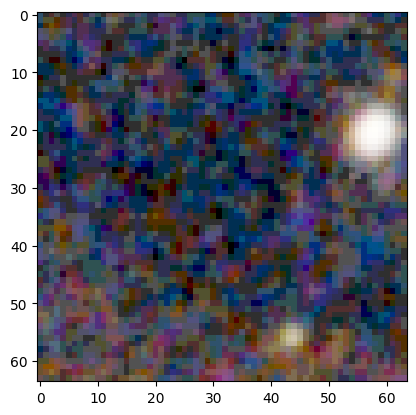

In [95]:
import matplotlib.pyplot as plt

def make_patch(image, x,y, size = 64):
  x_min = int(np.clip(x-size/2, 0, image.shape[0]))
  x_max = int(np.clip(x+size/2, 0, image.shape[0]))
  y_min = int(np.clip(y-size/2, 0, image.shape[1]))
  y_max = int(np.clip(y+size/2, 0, image.shape[1]))
  return image[x_min:x_max, y_min:y_max]


#plt.imshow(apply_stretch(make_patch(data,catalog['xcentroid'][10],catalog['ycentroid'][10])), cmap='gray')
plt.imshow(apply_stretch(make_patch(data, catalog['xcentroid'].iloc[0], catalog['ycentroid'].iloc[0])))


In [103]:
def make_patch(image, x, y, size=64):
    x = int(x)
    y = int(y)
    half_size = size // 2

    x_min = max(x - half_size, 0)
    x_max = min(x + half_size, image.shape[0])
    y_min = max(y - half_size, 0)
    y_max = min(y + half_size, image.shape[1])

    patch = image[x_min:x_max, y_min:y_max, :]  # include all channels
    return patch


In [104]:
import os
from matplotlib import pyplot as plt

output_folder = "patches"
os.makedirs(output_folder, exist_ok=True)

for idx in range(10):
    x = catalog['xcentroid'].iloc[idx]
    y = catalog['ycentroid'].iloc[idx]

    patch = make_patch(data, x, y, size=64)

    # Skip if patch is empty
    if patch.size == 0:
        print(f"Skipping index {idx} due to empty patch.")
        continue

    stretched_patch = apply_stretch(patch)

    fig, ax = plt.subplots(figsize=(2,2))
    ax.imshow(stretched_patch, cmap='gray')
    ax.axis('off')

    filename = os.path.join(output_folder, f"star_patch_{idx}.png")
    plt.savefig(filename, bbox_inches='tight', pad_inches=0)
    plt.close(fig)



Skipping index 2 due to empty patch.
Skipping index 3 due to empty patch.
Skipping index 4 due to empty patch.
Skipping index 8 due to empty patch.


In [111]:
import pandas as pd
top10 = catalog.sort_values('flux', ascending=False).head(10)



labels = []
for idx, row in top10.iterrows():
    morph = "star"  # assume all 10 are stars

    spec_class = row['spectral_type'][0] if pd.notna(row['spectral_type']) else "Unknown"

    labels.append({
        "patch_id": idx,
        "morphology": morph,
        "spectral_class": spec_class
    })

labels
#Brigthness class is unavailable for these stars


[{'patch_id': 141, 'morphology': 'star', 'spectral_class': 'A'},
 {'patch_id': 206, 'morphology': 'star', 'spectral_class': 'Unknown'},
 {'patch_id': 374, 'morphology': 'star', 'spectral_class': 'Unknown'},
 {'patch_id': 347, 'morphology': 'star', 'spectral_class': 'F'},
 {'patch_id': 299, 'morphology': 'star', 'spectral_class': 'M'},
 {'patch_id': 154, 'morphology': 'star', 'spectral_class': 'F'},
 {'patch_id': 14, 'morphology': 'star', 'spectral_class': 'K'},
 {'patch_id': 99, 'morphology': 'star', 'spectral_class': 'F'},
 {'patch_id': 365, 'morphology': 'star', 'spectral_class': 'G'},
 {'patch_id': 66, 'morphology': 'star', 'spectral_class': 'G'}]

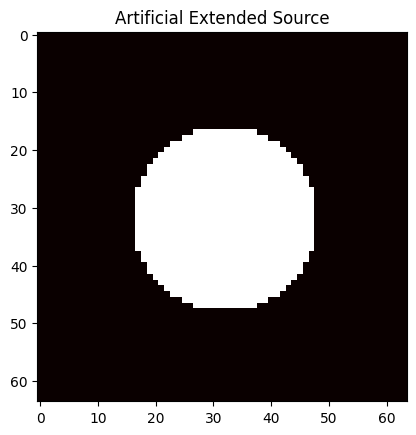

In [118]:
from skimage.draw import disk
import numpy as np
import matplotlib.pyplot as plt

def generate_extended_source(size=64):
    # Generate a blank image (dark background)
    image = np.zeros((size, size))

    # Draw a circular blob (Gaussian-like)
    rr, cc = disk((size // 2, size // 2), size // 4, shape=image.shape)
    image[rr, cc] = 1  # Bright region

    return image

# Test
extended_example = generate_extended_source()
plt.imshow(extended_example, cmap='hot')
plt.title("Artificial Extended Source")
plt.show()


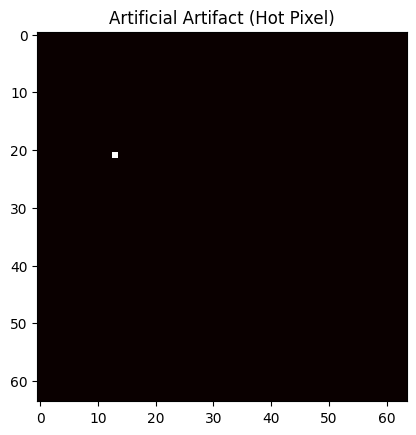

In [119]:
def generate_artifact(size=64):
    # Generate a blank image (dark background)
    image = np.zeros((size, size))

    # Simulate a hot pixel (a single bright spot)
    x, y = np.random.randint(0, size), np.random.randint(0, size)
    image[x, y] = 255  # A bright pixel

    return image

# Test
artifact_example = generate_artifact()
plt.imshow(artifact_example, cmap='hot')
plt.title("Artificial Artifact (Hot Pixel)")
plt.show()


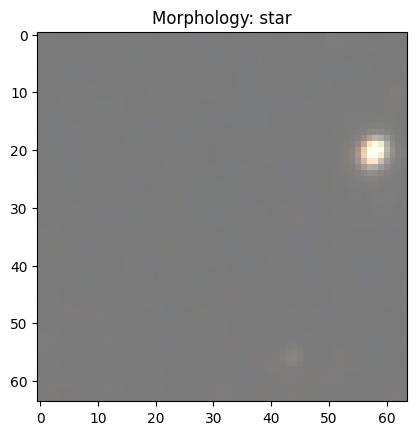

In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.draw import disk
from random import randint

# Function to generate a patch of an extended source (e.g., galaxy or nebula)
def generate_extended_source(size=64):
    image = np.zeros((size, size))
    rr, cc = disk((size // 2, size // 2), size // 4, shape=image.shape)
    image[rr, cc] = 1  # Simulate an extended source (like a nebula)
    return image

# Function to generate an artifact (e.g., hot pixel or cosmic ray)
def generate_artifact(size=64):
    image = np.zeros((size, size))
    x, y = randint(0, size-1), randint(0, size-1)
    image[x, y] = 255  # A hot pixel
    return image

# Function to generate a cosmic ray (bright line or spot)
def generate_cosmic_ray(size=64):
    image = np.zeros((size, size))
    x_start = randint(0, size-10)
    x_end = x_start + 5
    y = randint(0, size)
    image[x_start:x_end, y] = 255  # A vertical cosmic ray line
    return image

# Function to create labels for patches
def label_patch(morphology, brightness_class="N/A", spectral_class="N/A"):
    return {
        "morphology": morphology,
        "brightness_class": brightness_class,
        "spectral_class": spectral_class
    }

# Create a list of 10 examples (mixing real data with artificial data)
labels = []

# Assuming your catalog has at least 10 patches
for idx in range(10):
    # Here, I'll randomly decide the morphology for illustration
    if idx % 2 == 0:  # Even index -> star (real)
        morphology = "star"
        brightness_class = "bright"
        spectral_class = "G-type"  # Example: Set according to your catalog
        patch = make_patch(data, catalog['xcentroid'].iloc[idx], catalog['ycentroid'].iloc[idx])
    elif idx % 3 == 0:  # Every third -> Extended source (e.g., galaxy)
        morphology = "extended"
        patch = generate_extended_source()
        brightness_class = "medium"
        spectral_class = "N/A"
    else:  # Odd index -> Artifact
        morphology = "artifact"
        patch = generate_artifact() if idx % 4 == 0 else generate_cosmic_ray()
        brightness_class = "high"
        spectral_class = "N/A"

    # Store the labels and patch information
    labels.append({
        "patch_id": idx,
        "morphology": morphology,
        "brightness_class": brightness_class,
        "spectral_class": spectral_class,
        "patch_image": patch
    })

# Convert to pandas DataFrame
labels_df = pd.DataFrame(labels)

# Now you have the DataFrame of labeled patches, including both real and artificial ones
# You can save this to a CSV if needed:
labels_df.to_csv('labeled_patches.csv', index=False)

# Visualize one of the generated artificial examples
plt.imshow(labels_df["patch_image"].iloc[0], cmap='hot')
plt.title(f'Morphology: {labels_df["morphology"].iloc[0]}')
plt.show()

# To merge this with your existing catalog, you can append the artificial examples
final_df = pd.concat([catalog, labels_df[['patch_id', 'morphology', 'brightness_class', 'spectral_class']]])


In [96]:
patches = []
valid_rows = []
for _, row in catalog.iterrows():
    patch = make_patch(data, row['xcentroid'], row['ycentroid'])
    if patch.shape == (64,64):
        patches.append(patch)
        valid_rows.append(row)
X = np.array(patches)[..., np.newaxis]
y = pd.DataFrame(valid_rows)['spectral_label'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

KeyError: 'spectral_label'

In [135]:
#TO BUILD CNN USE CODE FROM HW 5

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

num_classes = 7

model = Sequential()

#model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)))
#model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(64, 64, 3)))  # Change (64, 64, 1) to (64, 64, 3)

#model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(64, 64, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])



In [140]:
catalog['spectral_type'].unique()

array(['A8V', nan, 'F5', 'M0III', 'F6III', 'K5', 'F6', 'G', 'G0', 'A5V',
       'K0III', 'A7Vn', 'K2III', 'K2', 'G5III', 'G5', 'G1IV', 'DA',
       'G2IV', 'G0V', 'G2III', 'K0', 'K1III', 'G3IV', 'F8'], dtype=object)

Shape of X: (59, 64, 64, 3)
Shape of y: (59,)
Shape of X after normalization: (59, 64, 64, 3)
Shape of x_train: (47, 64, 64, 3)
Shape of x_test: (12, 64, 64, 3)
Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 323ms/step - accuracy: 0.7181 - loss: 1.8438 - val_accuracy: 0.5833 - val_loss: 1.9155
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - accuracy: 0.6973 - loss: 1.8098 - val_accuracy: 0.5833 - val_loss: 1.8999
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - accuracy: 0.7077 - loss: 1.7968 - val_accuracy: 0.5833 - val_loss: 1.8770
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - accuracy: 0.6868 - loss: 1.7867 - val_accuracy: 0.5833 - val_loss: 1.8445
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - accuracy: 0.6764 - loss: 1.7085 - val_accuracy: 0.5833 - val_loss: 1.8021
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.6868 - loss: 1.6682 - val_accuracy: 0.5833 - val_loss: 1.7485
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - accuracy: 0.7077 - loss: 1.5852

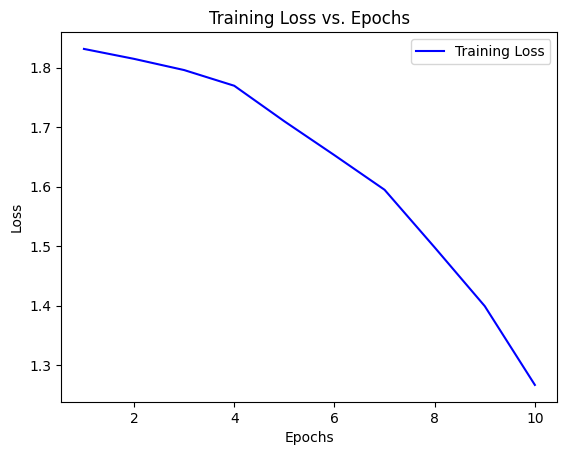

''

In [143]:
# Assuming patches and labels are correctly populated
X = np.array(patches, dtype=np.float32)
y = np.array(labels)

# Check the shape of X and y
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

# Normalize pixel values to [0, 1]
X = X / 255.0

# Check for correct shape
print(f"Shape of X after normalization: {X.shape}")

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure the data is of the correct shape
print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of x_test: {x_test.shape}")

# Train model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=32)

# Plot training loss
loss = history.history['loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
""


In [115]:
le = LabelEncoder()
catalog['spectral_label'] = le.fit_transform(catalog['simple_spectral_class'])
catalog.head()

,xcentroid,ycentroid,sharpness,roundness1,roundness2,npix,peak,flux,mag,daofind_mag,ra,dec,star_name,spectral_type,object_type,spectral_label,simple_spectral_class
id,,,,,,,,,,,,,,,,,
141,528.089176,742.247828,0.398289,-0.361663,0.034024,25,39497.666667,630290.333333,-14.498852,-8.135875,214.018045,18.911241,V* CN Boo,A8V,dS*,0,A
206,633.185782,969.568601,0.490310,-0.439071,-0.581985,25,26445.333333,590979.333333,-14.428931,-6.302044,213.897091,19.164447,GES J14153841+1910240,NaN,*,6,NaN
374,437.349887,1834.096608,0.459582,-0.062020,0.682515,25,26797.000000,429697.000000,-14.082906,-7.667650,214.137035,20.121386,HD 125040B,NaN,PM*,6,NaN
347,749.909651,1631.709088,0.429123,0.166398,0.599466,25,22284.333333,330005.000000,-13.796301,-7.616380,213.766044,19.899987,HD 124772,F5,*,2,F
299,982.197622,1341.371925,0.471253,0.158762,0.136665,25,13940.666667,159010.333333,-13.003563,-7.440915,213.489976,19.579732,HD 124569,M0III,*,5,M
